# Regressão Linear Múltipla
* Criar uma função de produção de educação dos cursos de economia no Brasil ou função de desempenho
* Variáveis que traduzem características do aluno como: esforço, família, história, estrutura, sexo e cor


In [4]:
library(dplyr)
library(ggplot2)
library(gplots)
library(cowplot)
library(graphics)
library(lmtest)
library(ggpubr)

In [20]:
library(Amelia)

In [5]:
data = read.table("dataset/enade.txt",sep=";", dec = ",", header = TRUE)
head(data)

NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,5,6,6,6,6,4
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,5,6,6,6,6,6,6,6,5


In [6]:
dim(data)

[1] 548127    137

# Alunos de Ciências Econômicas que fizeram o Enade


In [48]:
df = data[data$CO_GRUPO == 13 & data$TP_PRES == 555,]
head(df)
dim(df)


,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
161,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
162,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
163,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
164,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
165,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6
166,2018,1780,10008,10022,13,81867,1,4309605,43,4,...,6,6,6,6,6,6,6,6,6,6


[1] 8075  137

# Variáveis de interesse
### Ponderação: esforço, família, história, estrutura da universidade, sexo e raça
* Notas Gerais = 45 NT_GER
1. Sexo = 12 TP_SEXO
2. Raça ou Cor = 71 QE_I02
## Família
3. Estado Civil = 70 QE_I01
4. Escolaridade do pai = 73 QE_I04
5. Escolaridade da mãe = 74 QE_I05
6. Moradia = 75 QE_I06
7. Quantas pessoas moram com o estudante = 76 74 QE_I07
8. Renda total da família = 77 QE_I08
9. Situação Financeira = 78 QE_I09
10. Situação de Trabalho = 79 QE_I10
11. Contemplado com bolsa = 80 QE_I11
12. Se recebeu algum tipo de bolsa de permanência = 81 QE_I12
13. Se recebeu algum tipo de bolsa acadêmica = 82 QE_I13
14. Ingresso por meio de política de ação afirmativa ou inclusão social = 84 QE_I15
15. Tipo de escola cursou o ensino médio = 86 QE_I17
16. Modalidade de ensino = 87 QE_I18
17. Incentivo = 88 QE_I19
18. Grupo que ajudou a enfrentar dificuldades = 89 QE_I20
19. Alguêm da família que concluiu o ensino superir = 90 QE_I21
20. Quantidade de livros lido = 91 QE_I22
21. Horas dedicadas as estudo = 92 QE_I23
22. Motivo para ter escolhido a instituição de ensino = 94 QE_I25
23. O curso ofereceu oportunidades para superar dificuldades = 109 QE_I40
24. O curso exigiu organização e dedicação aos estudos = 111 QE_I42
## Estrutura da universidade
25. Metodologia de ensino = 98 QE_I29
26. Plano de ensino = 107 QE_I38
27. Coordenação = 110 QE_I41
28. Enventos = 114 QE_I45 
29. Domínio do conteúdo pelos professores = 126 QE_I57
30. Tecnologia da informação TIC's = 127 QE_I58
31. Quantidade de funcionários de apoio = 128 QE_I59
32. Infraestrutura das salas = 130 QE_I61
33. Equipamentos e materiais para aulas práticas em número suficiente = 131 QE_I62
34. Ambientes e equipamentos para aulas práticas adequados = 132 QE_I63
35. Biblioteca = 133 QE_I64
36. Refeitorio, cantina e banheiros em condições adequadas = 137 QE_I68



In [49]:
df = select(df, 45, 12, 71, 70, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 86, 87, 88, 89, 90, 91, 92, 94, 109, 111, 98, 107, 110, 114, 126, 127, 128, 130, 131, 132, 133, 137)

In [50]:
dim(df)

[1] 8075   37

In [51]:
str(df)

'data.frame':	8075 obs. of  37 variables:
 $ NT_GER : num  24.9 25.6 48.7 35.7 33.9 23.5 32.2 20.9 48.9 39.4 ...
 $ TP_SEXO: Factor w/ 2 levels "F","M": 1 2 2 1 2 2 1 1 2 1 ...
 $ QE_I02 : Factor w/ 7 levels "","A","B","C",..: 2 2 2 2 2 2 2 2 2 5 ...
 $ QE_I01 : Factor w/ 6 levels "","A","B","C",..: 2 2 2 3 3 2 2 2 2 2 ...
 $ QE_I04 : Factor w/ 7 levels "","A","B","C",..: 5 5 5 3 3 3 4 3 4 3 ...
 $ QE_I05 : Factor w/ 7 levels "","A","B","C",..: 5 3 5 4 5 3 5 3 5 4 ...
 $ QE_I06 : Factor w/ 7 levels "","A","B","C",..: 4 2 4 4 4 3 3 4 3 3 ...
 $ QE_I07 : Factor w/ 9 levels "","A","B","C",..: 4 4 4 5 3 4 6 4 5 4 ...
 $ QE_I08 : Factor w/ 8 levels "","A","B","C",..: 4 5 4 3 3 4 3 4 5 4 ...
 $ QE_I09 : Factor w/ 7 levels "","A","B","C",..: 7 6 4 6 6 6 3 7 4 5 ...
 $ QE_I10 : Factor w/ 6 levels "","A","B","C",..: 6 6 6 6 6 6 2 6 4 5 ...
 $ QE_I11 : Factor w/ 12 levels "","A","B","C",..: 4 3 4 6 9 3 4 9 3 4 ...
 $ QE_I12 : Factor w/ 7 levels "","A","B","C",..: 2 2 2 2 2 4 2 2 2 2 ...
 $ QE_I1

# Valores ausentes

In [39]:
sapply(df, function(x) sum(is.na(x)))

TP_SEXO  QE_I02  QE_I01  QE_I04  QE_I05  QE_I06  QE_I07  QE_I08  QE_I09  QE_I10 
      0       0       0       0       0       0       0       0       0       0 
 QE_I11  QE_I12  QE_I13  QE_I15  QE_I17  QE_I18  QE_I19  QE_I20  QE_I21  QE_I22 
      0       0       0       0       0       0       0       0       0       0 
 QE_I23  QE_I25  QE_I40  QE_I42  QE_I29  QE_I38  QE_I41  QE_I45  QE_I57  QE_I58 
      0       0     435     103     101     128     217     267      99     180 
 QE_I59  QE_I61  QE_I62  QE_I63  QE_I64  QE_I68 
    267     139    1024    1273     210     199

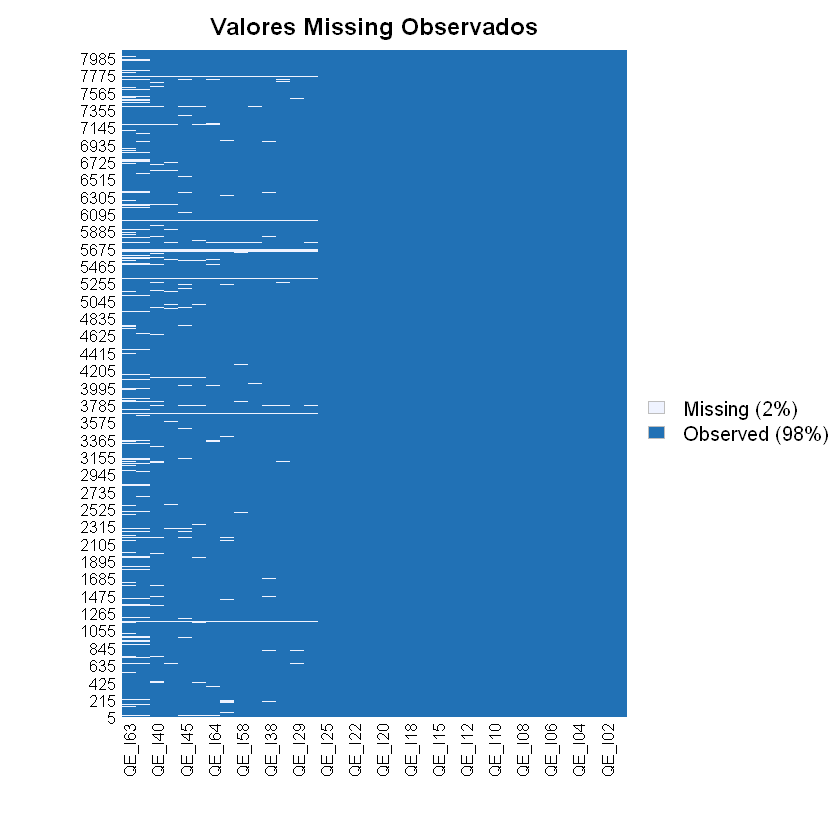

In [21]:
missmap(df, main="Valores Missing Observados")